# The Data

| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |


**Netflix** merupakan layanan penyewaan DVD yang didirikan pada tahun 1997 dan telah berkembang menjadi salah satu perusahaan hiburan dan media terbesar dengan meluncurkan situs Netflix.com, yang memberikan skema pembayaran biaya bulanan untuk menyewa film. Dalam project ini sebuah perusahaan produksi dengan konsep nostalgia, membutuhkan bantuan saya untuk melakukan riset terhadap film yang dirilis pada tahun 1990-an, menggunakan  dataset Netlfix sebagai sumber data utama.

# Question

1. Berapakah durasi film terbanyak di tahun 1990-an?

2. Genre film terbanyak apa yang berada dalam dataset di tahun 1990-an?

3. Negara mana yang menyumbang film terbanyak di tahun 1990-an?

4. Apakah ada durasi film pada ketiga besar genre film terbanyak yang memiliki durasi < 90 menit?

# Import Dataset

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv(r"D:\2. AND\13. BACKUP KERJA\DATACAMP\3. PROJECT NETFLIX\netflix_movies.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"""Demián Bichir, Héctor Bonilla, Oscar Serrano,...",Mexico,"""December 23, 2016""",2016,93,"""After a devastating earthquake hits Mexico Ci...",Dramas
1,s3,Movie,23:59,Gilbert Chan,"""Tedd Chan, Stella Chung, Henley Hii, Lawrence...",Singapore,"""December 20, 2018""",2011,78,"""When an army recruit is found dead, his fello...",Horror Movies
2,s4,Movie,9,Shane Acker,"""Elijah Wood, John C. Reilly, Jennifer Connell...",United States,"""November 16, 2017""",2009,80,"""In a postapocalyptic world, rag-doll robots h...",Action
3,s5,Movie,21,Robert Luketic,"""Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,"""January 1, 2020""",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"""Erdal Beşikçioğlu, Yasemin Allen, Melis Birka...",Turkey,"""July 1, 2017""",2016,1,"""A genetics professor experiments with a treat...",International TV


# Check Missing Values

In [2]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [3]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [4]:
netflix_df.duplicated().sum()

np.int64(0)

# Subset DataFrame

## Groupby Type = Movie

In [5]:
movie = netflix_df[netflix_df["type"] == "Movie"]
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"""Demián Bichir, Héctor Bonilla, Oscar Serrano,...",Mexico,"""December 23, 2016""",2016,93,"""After a devastating earthquake hits Mexico Ci...",Dramas
1,s3,Movie,23:59,Gilbert Chan,"""Tedd Chan, Stella Chung, Henley Hii, Lawrence...",Singapore,"""December 20, 2018""",2011,78,"""When an army recruit is found dead, his fello...",Horror Movies
2,s4,Movie,9,Shane Acker,"""Elijah Wood, John C. Reilly, Jennifer Connell...",United States,"""November 16, 2017""",2009,80,"""In a postapocalyptic world, rag-doll robots h...",Action
3,s5,Movie,21,Robert Luketic,"""Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,"""January 1, 2020""",2008,123,A brilliant group of students become card-coun...,Dramas
5,s7,Movie,122,Yasir Al Yasiri,"""Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahme...",Egypt,"""June 1, 2020""",2019,95,"""After an awful accident, a couple admitted to...",Horror Movies


In [6]:
movie.shape

(4677, 11)

## Filtering Movies in 1990s

In [7]:
movies_1990s = movie[(movie["release_year"] >= 1990) & (movie["release_year"] < 2000)]
movies_1990s.head()


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"""Samuel L. Jackson, John Heard, Kelly Rowan, C...",United States,"""November 1, 2019""",1997,119,"""After one of his high school students attacks...",Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"""Debra Winger, Barbara Hershey, Gabriel Byrne,...",United States,"""April 1, 2018""",1993,101,"""At the center of this engrossing melodrama is...",Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"""Will Ferrell, Chris Kattan, Dan Hedaya, Molly...",United States,"""December 1, 2019""",1998,82,"""After a run-in with Richard Grieco, dimwits D...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"""Martin Lawrence, Lynn Whitfield, Regina King,...",United States,"""December 1, 2020""",1996,108,"""When a philandering club promoter sets out to...",Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"""Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, ...",India,"""June 1, 2017""",1993,154,"""Raised by a kindly thief, orphaned Jimmy goes...",Dramas


In [8]:
movies_1990s.shape

(183, 11)

## Distribution Movies 1990s by Durations

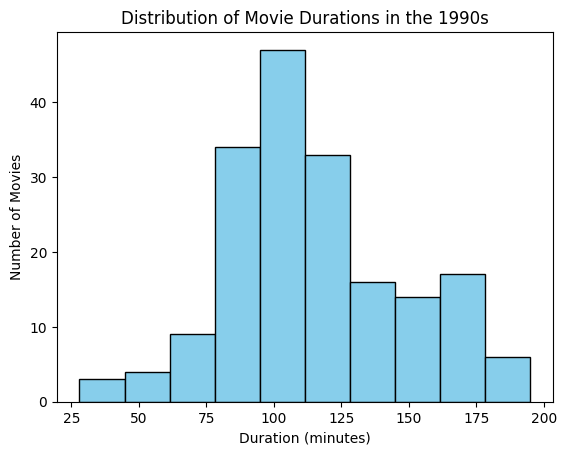

In [9]:
plt.hist(movies_1990s["duration"], color='skyblue', edgecolor='black', linewidth=1)
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

duration = 100

## Looking for Genre in Dataset Movies_1990s

In [10]:
movies_1990s["genre"].unique()


array(['Dramas', 'Comedies', 'Children', 'Action', 'Documentaries',
       'Classic Movies', 'Stand-Up', 'Cult Movies', 'Thrillers',
       'Horror Movies'], dtype=object)

## Distribution Movies 1990s by Genre

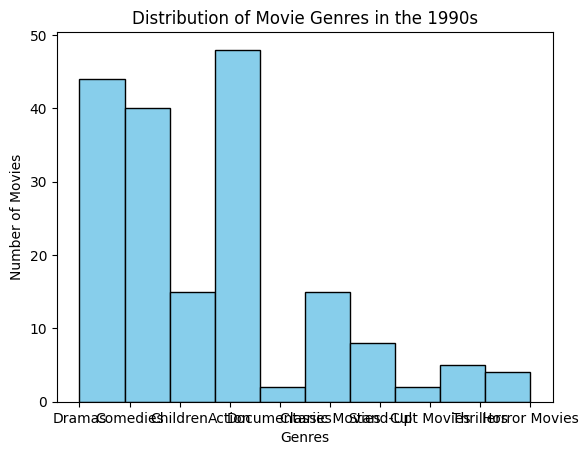

In [11]:
plt.hist(movies_1990s["genre"], color='skyblue', edgecolor='black', linewidth=1)
plt.title('Distribution of Movie Genres in the 1990s')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.show()

## Looking Country in Datasets

In [12]:
movies_1990s["country"].unique()

array(['United States', 'India', 'United Kingdom', 'Germany', 'Hong Kong',
       'France', 'Poland', 'Japan', 'Australia', 'Mexico', 'Thailand',
       'Canada', 'Argentina', 'Egypt'], dtype=object)

## Distribution Movies 1990s by Country

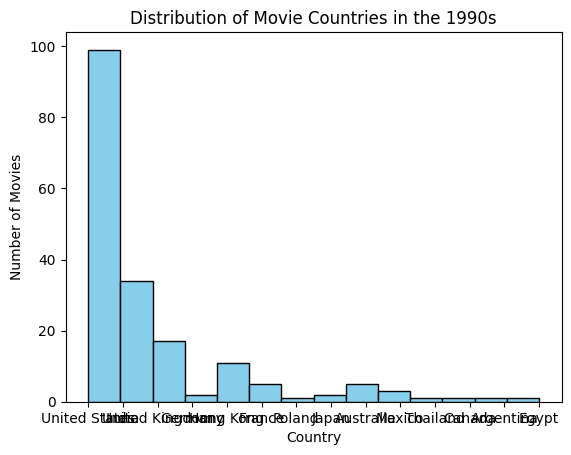

In [13]:
import matplotlib.pyplot as plt
plt.hist(movies_1990s["country"], bins= 14, color='skyblue', edgecolor='black', linewidth=1)
plt.title('Distribution of Movie Countries in the 1990s')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.show()

## Filtering by Genre in Movie Type

In [14]:
action_movies_1990s = movies_1990s[movies_1990s["genre"] == "Action"]
action_movies_1990s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
352,s508,Movie,Andaz Apna Apna,Rajkumar Santoshi,"""Aamir Khan, Salman Khan, Raveena Tandon, Kari...",India,"""May 11, 2020""",1994,160,"""Broke and with no concrete plans for the futu...",Action
431,s628,Movie,Austin Powers: The Spy Who Shagged Me,Jay Roach,"""Mike Myers, Heather Graham, Michael York, Rob...",United States,"""December 1, 2019""",1999,95,"""When diabolical genius Dr. Evil travels back ...",Action
468,s688,Movie,Bad Boys,Michael Bay,"""Will Smith, Martin Lawrence, Téa Leoni, Tchék...",United States,"""October 1, 2019""",1995,119,"""In this fast-paced actioner, two Miami narcot...",Action
515,s757,Movie,Barsaat,Rajkumar Santoshi,"""Twinkle Khanna, Bobby Deol, Danny Denzongpa, ...",India,"""April 1, 2018""",1995,166,"""A naïve young man and a rich city girl fall i...",Action
675,s1003,Movie,Blue Streak,Les Mayfield,"""Martin Lawrence, Luke Wilson, Peter Greene, D...",Germany,"""January 1, 2021""",1999,94,A jewel thief returns to his hiding place afte...,Action


In [15]:
action_movies_1990s.shape

(48, 11)

In [16]:
drama_movies_1990s = movies_1990s[movies_1990s["genre"] == "Dramas"]
drama_movies_1990s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"""Samuel L. Jackson, John Heard, Kelly Rowan, C...",United States,"""November 1, 2019""",1997,119,"""After one of his high school students attacks...",Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"""Debra Winger, Barbara Hershey, Gabriel Byrne,...",United States,"""April 1, 2018""",1993,101,"""At the center of this engrossing melodrama is...",Dramas
194,s274,Movie,Aashik Awara,Umesh Mehra,"""Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, ...",India,"""June 1, 2017""",1993,154,"""Raised by a kindly thief, orphaned Jimmy goes...",Dramas
240,s344,Movie,Agneepath,Mukul Anand,"""Amitabh Bachchan, Mithun Chakraborty, Danny D...",India,"""April 1, 2020""",1990,174,"""A boy grows up to become a gangster in pursui...",Dramas
315,s456,Movie,American Beauty,Sam Mendes,"""Kevin Spacey, Annette Bening, Thora Birch, We...",United States,"""January 1, 2020""",1999,122,"""While struggling to endure his tightly wound ...",Dramas


In [17]:
drama_movies_1990s.shape

(44, 11)

In [18]:
comedies_movies_1990s = movies_1990s[movies_1990s["genre"] == "Comedies"]
comedies_movies_1990s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"""Will Ferrell, Chris Kattan, Dan Hedaya, Molly...",United States,"""December 1, 2019""",1998,82,"""After a run-in with Richard Grieco, dimwits D...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"""Martin Lawrence, Lynn Whitfield, Regina King,...",United States,"""December 1, 2020""",1996,108,"""When a philandering club promoter sets out to...",Comedies
410,s593,Movie,As Good as It Gets,James L. Brooks,"""Jack Nicholson, Helen Hunt, Greg Kinnear, Cub...",United States,"""January 1, 2020""",1997,139,"""The structured world of a sour, obsessive-com...",Comedies
430,s627,Movie,Austin Powers: International Man of Mystery,Jay Roach,"""Mike Myers, Elizabeth Hurley, Michael York, M...",United States,"""December 1, 2019""",1997,90,"""A swingin' fashion photographer by day and a ...",Comedies
516,s758,Movie,BASEketball,David Zucker,"""Trey Parker, Matt Stone, Dian Bachar, Yasmine...",United States,"""November 1, 2018""",1998,103,"""When two slackers' made-up sport, BASEketball...",Comedies


In [19]:
comedies_movies_1990s.shape

(40, 11)

## Looping for Duration 90 in 3 Highest Genres in Movies 1900s

In [20]:
# Loop for duration 90 Action Movies
short_movie_count = 0
for label, row in action_movies_1990s.iterrows() :
    if row["duration"] < 90 :
        short_movie_count = short_movie_count + 1
    else:
        short_movie_count = short_movie_count

print("Jumlah action movies berdurasi 90 menit: " + str(short_movie_count))

Jumlah action movies berdurasi 90 menit: 7


In [21]:
# Loop for duration 90 Dramas Movies
short_movie_count = 0
for label, row in drama_movies_1990s.iterrows() :
    if row["duration"] < 90 :
        short_movie_count = short_movie_count + 1
    else:
        short_movie_count = short_movie_count

print("Jumlah drama movies berdurasi 90 menit: " + str(short_movie_count))

Jumlah drama movies berdurasi 90 menit: 2


In [22]:
# Loop for duration 90 Comedies Movies
short_movie_count = 0
for label, row in comedies_movies_1990s.iterrows() :
    if row["duration"] < 90 :
        short_movie_count = short_movie_count + 1
    else:
        short_movie_count = short_movie_count

print("Jumlah comedies movies berdurasi 90 menit: " + str(short_movie_count))

Jumlah comedies movies berdurasi 90 menit: 8


Quick Syntax

In [23]:
total_act_mov_1990s = (action_movies_1990s["duration"] < 90).sum()
print("Jumlah action movies berdurasi 90 menit:", total_act_mov_1990s)

Jumlah action movies berdurasi 90 menit: 7


In [24]:
total_dramas_mov_1990s = (drama_movies_1990s["duration"] < 90).sum()
print("Jumlah action movies berdurasi 90 menit:", total_dramas_mov_1990s)

Jumlah action movies berdurasi 90 menit: 2


In [25]:
total_comedies_mov_1990s = (comedies_movies_1990s["duration"] < 90).sum()
print("Jumlah action movies berdurasi 90 menit:", total_comedies_mov_1990s)

Jumlah action movies berdurasi 90 menit: 8


# Movies in 2000s

## Filtering Movies in 2000s

In [26]:
movies_2000s = movie[(movie["release_year"] >= 2000) & (movie["release_year"] < 2021)]
movies_2000s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"""Demián Bichir, Héctor Bonilla, Oscar Serrano,...",Mexico,"""December 23, 2016""",2016,93,"""After a devastating earthquake hits Mexico Ci...",Dramas
1,s3,Movie,23:59,Gilbert Chan,"""Tedd Chan, Stella Chung, Henley Hii, Lawrence...",Singapore,"""December 20, 2018""",2011,78,"""When an army recruit is found dead, his fello...",Horror Movies
2,s4,Movie,9,Shane Acker,"""Elijah Wood, John C. Reilly, Jennifer Connell...",United States,"""November 16, 2017""",2009,80,"""In a postapocalyptic world, rag-doll robots h...",Action
3,s5,Movie,21,Robert Luketic,"""Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,"""January 1, 2020""",2008,123,A brilliant group of students become card-coun...,Dramas
5,s7,Movie,122,Yasir Al Yasiri,"""Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahme...",Egypt,"""June 1, 2020""",2019,95,"""After an awful accident, a couple admitted to...",Horror Movies


## Distribution Movies 2000s by Durations

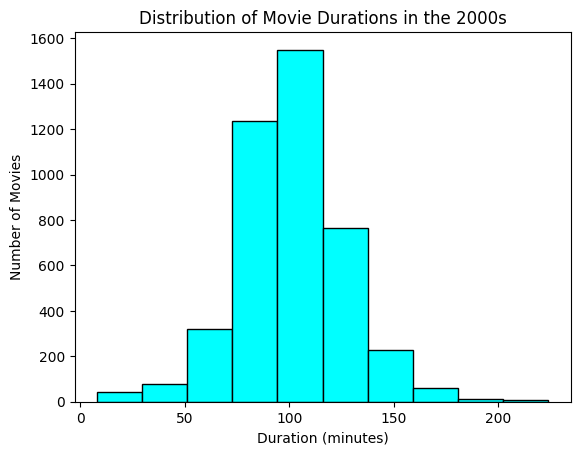

In [27]:
plt.hist(movies_2000s["duration"], color='cyan', edgecolor='black', linewidth=1)
plt.title('Distribution of Movie Durations in the 2000s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

## Looking for genres in movies 2000's

In [28]:
movies_2000s["genre"].unique()

array(['Dramas', 'Horror Movies', 'Action', 'Documentaries',
       'Independent Movies', 'Comedies', 'Sci-Fi', 'International Movies',
       'Children', 'Uncategorized', 'Thrillers', 'Stand-Up',
       'Anime Features', 'Music', 'Cult Movies', 'Romantic Movies',
       'Classic Movies', 'LGBTQ Movies'], dtype=object)

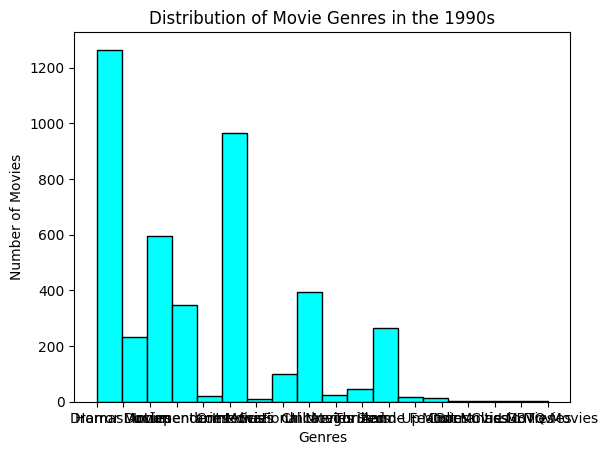

In [29]:
plt.hist(movies_2000s["genre"], bins= 18, color='cyan', edgecolor='black', linewidth=1)
plt.title('Distribution of Movie Genres in the 1990s')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.show()

## Looking Country in Movies_2000s

In [30]:
movies_2000s["country"].unique()

array(['Mexico', 'Singapore', 'United States', 'Egypt', 'India',
       'Thailand', 'Nigeria', 'Norway', 'South Korea', 'Italy',
       'Indonesia', 'Canada', 'Romania', 'Spain', 'Turkey', 'Iceland',
       'South Africa', 'France', 'Portugal', 'Hong Kong',
       'United Kingdom', 'Argentina', 'Germany', 'Poland', 'Japan',
       'Kenya', 'New Zealand', 'Pakistan', 'Australia', 'China', 'Taiwan',
       'Netherlands', 'Denmark', 'Philippines', 'United Arab', 'Iran',
       'Israel', 'Uruguay', 'Bulgaria', 'Brazil', 'Malaysia', 'Serbia',
       'Colombia', 'Ireland', 'Peru', 'Chile', 'Sweden', 'Ghana',
       'Saudi Arabia', 'Namibia', 'Belgium', 'Vietnam', 'Russia',
       'Lebanon', 'Zimbabwe', 'Hungary', 'Finland', 'Venezuela',
       'Cambodia', 'Slovenia', 'Switzerland', 'Kuwait', 'Austria',
       'Bangladesh', 'Czech Republic', 'Georgia', 'Guatemala', 'Jamaica',
       'Paraguay', 'Somalia', 'Croatia'], dtype=object)

In [31]:
southeast_asia = movies_2000s[movies_2000s["country"].isin(["Singapore", "Thailand", "Indonesia", "Philippines", "Malaysia", "Vietnam",])]
southeast_asia

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s3,Movie,23:59,Gilbert Chan,"""Tedd Chan, Stella Chung, Henley Hii, Lawrence...",Singapore,"""December 20, 2018""",2011,78,"""When an army recruit is found dead, his fello...",Horror Movies
10,s14,Movie,"""2,215""",Nottapon Boonprakob,Artiwara Kongmalai,Thailand,"""March 1, 2019""",2018,89,"""This intimate documentary follows rock star A...",Documentaries
21,s32,Movie,#FriendButMarried,Rako Prijanto,"""Adipati Dolken, Vanesha Prescilla, Rendi Jhon...",Indonesia,"""May 21, 2020""",2018,102,"""Pining for his high school crush for years, a...",Dramas
22,s33,Movie,#FriendButMarried 2,Rako Prijanto,"""Adipati Dolken, Mawar de Jongh, Sari Nila, Vo...",Indonesia,"""June 28, 2020""",2020,104,"""As Ayu and Ditto finally transition from best...",Dramas
39,s58,Movie,100% Halal,Jastis Arimba,"""Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitr...",Indonesia,"""January 7, 2021""",2020,101,"""After high school, a young woman marries the ...",Dramas
...,...,...,...,...,...,...,...,...,...,...,...
4764,s7707,Movie,Yes or No,Saratswadee Wongsomphet,"""Sushar Manaying, Supanart Jittaleela, Arisara...",Thailand,"""December 6, 2018""",2010,111,"""Traditional girl Pie is initially uncomfortab...",International Movies
4765,s7708,Movie,Yes or No 2,Saratswadee Wongsomphet,"""Supanart Jittaleela, Sushar Manaying, Nisa Bo...",Thailand,"""November 8, 2018""",2012,112,"""No longer university girls, Kim and Pie face ...",International Movies
4766,s7709,Movie,Yes or No 2.5,Kirati Nakintanon,"""Supanart Jittaleela, Pimpakan Bangchawong, Ch...",Thailand,"""November 8, 2018""",2015,107,"""Roommates Wine and Pie find their lives turne...",International Movies
4776,s7728,Movie,You Changed My Life,Cathy Garcia-Molina,"""John Lloyd Cruz, Sarah Geronimo, Rayver Cruz,...",Philippines,"""February 27, 2019""",2009,116,"""Laida and Miggy think they've found perfect h...",Comedies


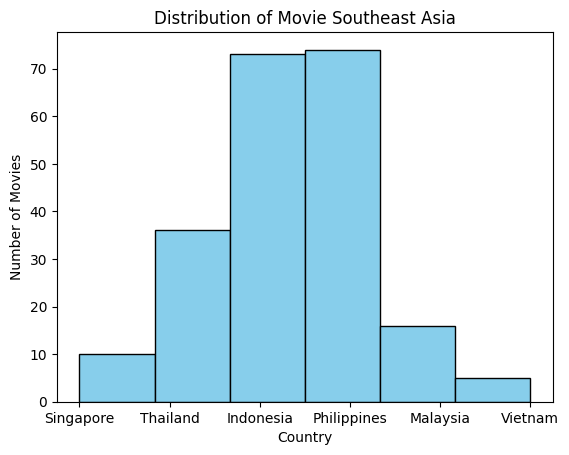

In [32]:
# Total Southeast Asia Movies
plt.hist(southeast_asia["country"], color='skyblue', bins= 6, edgecolor='black', linewidth=1)
plt.title('Distribution of Movie Southeast Asia')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.show()

## Filtering by Genre in Movie Type

In [33]:
dramas_movies_2000s = movies_2000s[movies_2000s["genre"] == "Dramas"]
dramas_movies_2000s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"""Demián Bichir, Héctor Bonilla, Oscar Serrano,...",Mexico,"""December 23, 2016""",2016,93,"""After a devastating earthquake hits Mexico Ci...",Dramas
3,s5,Movie,21,Robert Luketic,"""Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,"""January 1, 2020""",2008,123,A brilliant group of students become card-coun...,Dramas
9,s11,Movie,1922,Zak Hilditch,"""Thomas Jane, Molly Parker, Dylan Schmid, Kait...",United States,"""October 20, 2017""",2017,103,"""A farmer pens a confession admitting to his w...",Dramas
12,s16,Movie,Oct-01,Kunle Afolayan,"""Sadiq Daba, David Bailie, Kayode Olaiya, Kehi...",Nigeria,"""September 1, 2019""",2014,149,"""Against the backdrop of Nigeria's looming ind...",Dramas
13,s18,Movie,22-Jul,Paul Greengrass,"""Anders Danielsen Lie, Jon Øigarden, Jonas Str...",Norway,"""October 10, 2018""",2018,144,"""After devastating terror attacks in Norway, a...",Dramas


In [34]:
comedies_movies_2000s = movies_2000s[movies_2000s["genre"] == "Comedies"]
comedies_movies_2000s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
14,s19,Movie,15-Aug,Swapnaneel Jayakar,"""Rahul Pethe, Mrunmayee Deshpande, Adinath Kot...",India,"""March 29, 2019""",2019,124,"""On India's Independence Day, a zany mishap in...",Comedies
23,s34,Movie,#realityhigh,Fernando Lebrija,"""Nesta Cooper, Kate Walsh, John Michael Higgin...",United States,"""September 8, 2017""",2017,99,"""When nerdy high schooler Dani finally attract...",Comedies
24,s35,Movie,#Roxy,Michael Kennedy,"""Jake Short, Sarah Fisher, Booboo Stewart, Dan...",Canada,"""April 10, 2019""",2018,105,A teenage hacker with a huge nose helps a cool...,Comedies
25,s37,Movie,#Selfie,Cristina Jacob,"""Flavia Hojda, Crina Semciuc, Olimpia Melinte,...",Romania,"""June 1, 2019""",2014,125,"""Two days before their final exams, three teen...",Comedies
26,s38,Movie,#Selfie 69,Cristina Jacob,"""Maia Morgenstern, Olimpia Melinte, Crina Semc...",Romania,"""June 1, 2019""",2016,119,"""After a painful breakup, a trio of party-lovi...",Comedies


In [35]:
action_movies_2000s = movies_2000s[movies_2000s["genre"] == "Action"]
action_movies_2000s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
2,s4,Movie,9,Shane Acker,"""Elijah Wood, John C. Reilly, Jennifer Connell...",United States,"""November 16, 2017""",2009,80,"""In a postapocalyptic world, rag-doll robots h...",Action
16,s22,Movie,​Goli Soda 2,Vijay Milton,"""Samuthirakani, Bharath Seeni, Vinoth, Esakki ...",India,"""September 15, 2018""",2018,128,"""A taxi driver, a gangster and an athlete stru...",Action
32,s45,Movie,Æon Flux,Karyn Kusama,"""Charlize Theron, Marton Csokas, Jonny Lee Mil...",United States,"""February 1, 2018""",2005,93,"""Aiming to hasten an uprising, the leader of a...",Action
37,s51,Movie,"""10,000 B.C.""",Roland Emmerich,"""Steven Strait, Camilla Belle, Cliff Curtis, J...",United States,"""June 1, 2019""",2008,109,Fierce mammoth hunter D'Leh sets out on an imp...,Action
44,s69,Movie,14 Blades,Daniel Lee,"""Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, ...",Hong Kong,"""April 3, 2019""",2010,113,"""In the age of the Ming Dynasty, Quinglong is ...",Action


## Looping for Duration 90 in 3 Highest Genres in Movies 2000s

In [36]:
# Loop for duration 90 in movie dramas
doc_90_count = 0
for label, row in dramas_movies_2000s.iterrows() :
    if row["duration"] == 90 :
        doc_90_count= doc_90_count + 1
    else:
        doc_90_count= doc_90_count

print("Jumlah dramas movies berdurasi 90 menit: " + str(doc_90_count))

Jumlah dramas movies berdurasi 90 menit: 26


In [37]:
# Loop for duration 90 in movie comedies
doc_90_count = 0
for label, row in comedies_movies_2000s.iterrows() :
    if row["duration"] == 90 :
        doc_90_count= doc_90_count + 1
    else:
        doc_90_count= doc_90_count

print("Jumlah comedies movies berdurasi 90 menit: " + str(doc_90_count))

Jumlah comedies movies berdurasi 90 menit: 16


In [38]:
# Loop for duration 90 in movie actions
doc_90_count = 0
for label, row in action_movies_2000s.iterrows() :
    if row["duration"] == 90 :
        doc_90_count= doc_90_count + 1
    else:
        doc_90_count= doc_90_count

print("Jumlah action movies berdurasi 90 menit: " + str(doc_90_count))

Jumlah action movies berdurasi 90 menit: 10


# Movies Indonesian Only

In [39]:
netflix_df.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


In [40]:
indonesia_movies = netflix_df[(netflix_df["country"] == "Indonesia")]
indonesia_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
21,s32,Movie,#FriendButMarried,Rako Prijanto,"""Adipati Dolken, Vanesha Prescilla, Rendi Jhon...",Indonesia,"""May 21, 2020""",2018,102,"""Pining for his high school crush for years, a...",Dramas
22,s33,Movie,#FriendButMarried 2,Rako Prijanto,"""Adipati Dolken, Mawar de Jongh, Sari Nila, Vo...",Indonesia,"""June 28, 2020""",2020,104,"""As Ayu and Ditto finally transition from best...",Dramas
39,s58,Movie,100% Halal,Jastis Arimba,"""Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitr...",Indonesia,"""January 7, 2021""",2020,101,"""After high school, a young woman marries the ...",Dramas
67,s100,Movie,3 Heroines,Iman Brotoseno,"""Reza Rahadian, Bunga Citra Lestari, Tara Basr...",Indonesia,"""January 5, 2019""",2016,124,Three Indonesian women break records by becomi...,Dramas
86,s124,Movie,5CM,Rizal Mantovani,"""Herjunot Ali, Raline Shah, Fedi Nuril, Pevita...",Indonesia,"""September 28, 2018""",2012,126,"""Five friends embark on a mission to climb the...",Dramas


In [41]:
indonesia_movies.shape

(73, 11)